In [181]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [197]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(week_n):
    """Returns the conditions probabilities of money market and every other ESP product.
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to convert to days interally in the function"""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 
    
    mmb1_cmma1 = np.poly1d([ 0.00024994 , 0.04285061] )
    mmb1_cmma0 = np.poly1d([  1.90191436e-07 ,  1.14177622e-04,   4.27823822e-02]  )
    mmb0_cmma1 = np.poly1d([ -2.22152468e-07 ,  5.56666918e-04 , -2.72233407e-02])
    mmb0_cmma0 = np.poly1d([ -3.91447706e-06 ,  9.05712561e-01])
    
    mmb1_cm1 = np.poly1d([ -2.72325078e-08  , 5.32423195e-05 ,  2.38412505e-03] )
    mmb1_cm0 = np.poly1d([ -1.42726293e-09,  -1.80445969e-06 ,  7.76728170e-03])
    mmb0_cm1 = np.poly1d([  2.14147475e-12 , -2.63521612e-08 ,  3.17358743e-05 ,  2.78799015e-04]  )
    mmb0_cm0 = np.poly1d([  8.89155499e-07 , -1.04545524e-03 ,  5.25039204e-01])
    
    mmb1_fx1 = np.poly1d( [  3.33096352e-07 , -2.53268707e-04 ,  8.78420412e-02]  )
    mmb1_fx0 = np.poly1d([  3.21421217e-07 , -2.53093541e-04  , 1.00861621e-01]  )
    mmb0_fx1 = np.poly1d([  8.13520129e-10 , -1.11358379e-06 ,  4.41488476e-04 ,  1.22727132e-02] )
    mmb0_fx0 = np.poly1d([ -5.22617568e-11  , 1.20747424e-07  ,-8.35091075e-05 ,  9.77209229e-01] )
    
    mmb1_loc1 = np.poly1d([ -6.88584993e-06  , 8.13262402e-03 , -1.30571054e+00] )
    mmb1_loc0 = np.poly1d([ 0.00085534 , 0.43796653] )
    mmb0_loc1 = np.poly1d([ 0.00072646  ,0.23500814] )
    mmb0_loc0 = np.poly1d([  1.79596101e-07 , -1.84220235e-04 ,  1.01132170e+00] )
    
    mmb1_es1 = np.poly1d([ -1.43391756e-06 ,  1.69345663e-03 ,  1.25351427e-01] )
    mmb1_es0 = np.poly1d([ -3.38921990e-07  , 1.35159497e-03 ,  3.39402903e-02])
    mmb0_es1 = np.poly1d([ -8.16745975e-07 ,  1.79663817e-03 ,  3.97801133e-02] )
    mmb0_es0 = np.poly1d( [ -2.59811437e-07  , 7.02324208e-05 ,  9.82922833e-01]  )

    mmb1_checking1 = np.poly1d([  1.73608910e-09 , -3.78755937e-06 ,  2.07446955e-03 ,  8.73610083e-02] )
    mmb1_checking0 = np.poly1d([ -3.05962684e-06 ,  5.53674395e-04 ,  3.41356363e-02] )
    mmb0_checking1 = np.poly1d([  1.23682027e-09 , -2.41442600e-06  , 1.06918980e-03  , 1.88596748e-01] )
    mmb0_checking0 = np.poly1d([ -1.54533070e-09 ,  3.58215902e-06,  -1.82026831e-03  , 6.67195706e-01] )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([  3.92200936e-10 , -8.19173481e-07 ,  5.11949889e-04 , -1.30289083e-02]  ) # done
    cmma1_cm0 = np.poly1d([  6.35984886e-08  ,-3.73360553e-05 ,  2.07589223e-02] )# done 
    cmma0_cm1 = np.poly1d([  3.81176599e-05 ,  1.22139859e-03])
    cmma0_cm0 = np.poly1d([ -1.15024291e-10 ,  3.45298192e-07 , -2.85069533e-04 ,  9.77720740e-01]) # done
    
    cmma1_fx1 = np.poly1d([  3.21482409e-07 , -2.61510522e-04  , 6.99901414e-02]  )
    cmma1_fx0 = np.poly1d([  7.24477483e-10 , -1.22662554e-06  , 6.13488769e-04 , -1.76314520e-02])
    cmma0_fx1 = np.poly1d([  5.13064941e-10,  -8.08717003e-07 ,  3.74272429e-04 , -1.03734158e-02])
    cmma0_fx0 = np.poly1d([ -6.38675995e-11,   1.73330676e-07 , -1.58288640e-04  , 9.73112366e-01])

    
    cmma1_loc1 = np.poly1d([  6.42091407e-07 , -2.78659790e-04  , 1.30055658e-01]  )
    cmma1_loc0 = np.poly1d([  1.43583225e-09  ,-1.82141282e-06  , 8.86758771e-04 , 9.93852887e-04]  )
    cmma0_loc1 = np.poly1d([  3.46529676e-05 ,  1.19463083e-01] )
    cmma0_loc0 = np.poly1d([ -2.23892652e-10  , 4.20211796e-07  ,-2.64305197e-04  , 9.98785727e-01] )
    
    cmma1_es1 = np.poly1d([ 0.00077921 , 0.07685184] )
    cmma1_es0 = np.poly1d([  2.95533578e-09 , -3.33721088e-06 ,  1.53087003e-03   ,8.81550495e-02] )
    cmma0_es1 = np.poly1d([ -4.04459012e-07 ,  1.53471361e-03 , -1.24382750e-01] )
    cmma0_es0 = np.poly1d([  1.43164419e-07 , -1.52904869e-04  , 9.62352745e-01]   )
    
    cmma1_checking1 = np.poly1d([  1.37295973e-09 , -3.00959802e-06 ,  1.62127390e-03  , 1.25127921e-01] )
    cmma1_checking0 = np.poly1d([  4.46814215e-05  , 2.54237288e-02] )
    cmma0_checking1 = np.poly1d([  9.61879214e-08 , -2.18643614e-04 ,  2.17258787e-01] )
    cmma0_checking0 = np.poly1d([ -1.02339954e-09  , 2.42929967e-06  ,-1.21076118e-03 ,  6.50732150e-01]  )
    # Cash Management 
    cm1_fx1 = np.poly1d([  2.45508721e-07 , -1.91372975e-04,   6.01628293e-02]  )
    cm1_fx0 = np.poly1d([  7.89690907e-10 , -1.33849056e-06  , 6.86297408e-04 ,-4.29527926e-02]  )
    cm0_fx1 = np.poly1d([  2.65301737e-07 , -1.80717131e-04 ,  4.15537881e-02])
    cm0_fx0 = np.poly1d([ -1.72635415e-11  , 7.57095528e-08 , -1.08539151e-04  , 9.79867508e-01] )
    
    cm1_loc1 = np.poly1d([ -1.35541949e-06  , 2.83515636e-03 , -3.90973337e-01] )
    cm1_loc0 = np.poly1d([ -1.17427015e-06 ,  2.39546796e-03 , -1.54877807e-01] )
    cm0_loc1 = np.poly1d([ -6.51478795e-09  , 8.73137741e-06 , -1.72078493e-03  , 2.43456090e-01]  )
    cm0_loc0 = np.poly1d([ -8.04349289e-07 ,  1.49218655e-04  , 9.77257708e-01]  )
    
    cm1_es1 = np.poly1d([ -9.92933816e-07 ,  2.05731305e-03 , -2.99011733e-02]   )
    cm1_es0 = np.poly1d([ -2.63370360e-09 ,  3.07785652e-06  , 3.06034463e-04 ,  1.62269616e-01]  )
    cm0_es1 = np.poly1d([ -2.49841411e-07 ,  1.11121324e-03,   7.46696998e-02])
    cm0_es0 = np.poly1d([  2.42513856e-07 , -2.84915542e-04 ,  9.64324106e-01] )
    
    cm1_checking1 = np.poly1d([  1.39451187e-09  ,-3.08989453e-06  , 1.72406989e-03 ,  6.67841846e-02])
    cm1_checking0 = np.poly1d([ -1.76043738e-08 ,  7.74045992e-05 ,  1.08367206e-02] )
    cm0_checking1 = np.poly1d([  1.67619937e-07 , -3.61894822e-04 ,  2.72616461e-01])
    cm0_checking0 = np.poly1d([ -1.00660844e-09 ,  2.36677190e-06 , -1.15568226e-03 ,  6.61332499e-01]  )
    # FX Product
    fx1_loc1  = np.poly1d([ -1.63316330e-07 ,  5.27542053e-04 ,  3.07580467e-02])
    fx1_loc0 = np.poly1d([ -8.07571917e-08  , 3.97382185e-04 ,  6.79459055e-02] )
    fx0_loc1 = np.poly1d([  7.31321592e-08  , 2.29824353e-04  , 1.07667986e-01]  )
    fx0_loc0 = np.poly1d([  7.83840553e-08 , -1.26080978e-04  , 9.98425688e-01])
    
    fx1_es1 = np.poly1d([ -4.86723961e-08  , 2.11682608e-04 ,  1.47499457e-01])
    fx1_es0 = np.poly1d([  5.36139682e-07 , -9.82859548e-05 ,  1.48076671e-01])
    fx0_es1 = np.poly1d([ -3.82002393e-07 ,  4.33547512e-04 ,  1.43923738e-01])
    fx0_es0 = np.poly1d([  2.30235962e-08 , -1.77447562e-06 ,  9.66298687e-01] )
    
    fx1_checking1 = np.poly1d([  8.25569790e-08 , -9.07688618e-05 ,  1.05521423e-01] )
    fx1_checking0 = np.poly1d([  1.29579834e-05 ,  2.94664390e-02]  )
    fx0_checking1 = np.poly1d([  1.30089467e-09  ,-2.79172239e-06  , 1.41604472e-03   ,1.76804804e-01] )
    fx0_checking0 = np.poly1d([ -1.06281780e-09 ,  2.52466162e-06 , -1.35304562e-03  , 7.38720930e-01])
    # Letters of Credit
    loc1_es1 = np.poly1d([ -8.46456481e-19 ,  5.55555556e-01] )
    loc1_es0 = np.poly1d([ 0.00033317  ,0.22222222])
    loc0_es1 = np.poly1d([ -1.08807516e-18 ,  5.55555556e-01]  )
    loc0_es0 = np.poly1d([  1.74911032e-08  ,-3.00553732e-05 ,  1.00579137e+00] )
    
    loc1_checking1 = np.poly1d([  1.16843757e-04  , 7.41731917e-01] )
    loc1_checking0 = np.poly1d([  1.19975953e-08 , -4.36318499e-06 ,  8.83611847e-03] )
    loc0_checking1 = np.poly1d([  1.88805816e-04  , 7.02628385e-01] )
    loc0_checking0 = np.poly1d([  2.99456530e-07 , -3.12743181e-04 ,  8.49707092e-01]  )
    # Enterprise sweep
    es1_checking1 = np.poly1d([  2.78954631e-04  , 6.64974264e-01] )
    es1_checking0 = np.poly1d([ 0.00070279,  0.40239424]   )
    es0_checking1 = np.poly1d([ -6.17404623e-07 ,  1.06499052e-03  , 5.32191814e-01] )
    es0_checking0 = np.poly1d([  1.98985855e-04 ,  7.04594335e-01]  )
    
    
    
    # return the probabilities in the form of a dictionary
    # ensure that nothing has a 0% probabiliy (will block the markob model)
    money_market_joint_probabilities = {}

    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
    money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)

    #         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days)
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
    money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
    money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)

    money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
    money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)

    #         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
    money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
    money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)

    money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
    money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
    money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
    money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
    money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)
    
    money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
    #     if round( cm0_fx1(days),3)== 0:
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
    money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
    money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)
    money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
    money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
    money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
    money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
    money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
    money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
    money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
    money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
    money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)

    money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)

    
#     if round(mmb1_cmma1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cmma1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
#     if round(mmb1_cmma0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cmma0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
#     if round(mmb1_cmma0(days),3)== 0:
#         money_market_joint_probabilities['mmb0_cmma1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
#     if round(mmb0_cmma0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_cmma0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)

#     if round(mmb1_checking1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
#     if round(mmb1_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
#     if round(mmb0_checking1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
#     if round(mmb0_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
        
#     if round(mmb1_cm1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
#     if round(mmb1_cm0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
#     if round(mmb0_cm1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
#     if round(mmb0_cm0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
        
#     if round(mmb1_fx1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
#     if round( mmb1_fx0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)
#     if round(mmb0_fx1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
#     if round( mmb0_fx0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    
#     if round(mmb1_loc1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
#     if round(mmb1_loc0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
#     if round(mmb0_loc1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
#     if round(  mmb0_loc0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
        
#     if round(mmb1_es1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
#     if round(mmb1_es0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
#     if round(mmb0_es1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
#     if round( mmb0_es0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
        
#     if round( mmb1_checking1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
#     if round(mmb1_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
#     if round(mmb0_checking1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
#     if round( mmb0_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    
#     if round(  cmma1_cm1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)
#     if round(cmma1_cm0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
#     if round(cmma0_cm1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
#     if round(  cmma0_cm0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)
        
#     if round(  cmma1_fx1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
#     if round(cmma1_fx0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
#     if round(cmma0_fx1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
#     if round( cmma0_fx0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)
        
#     if round(cmma1_loc1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
#     if round(cmma1_loc0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
#     if round(cmma0_loc1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
#     if round( cmma0_loc0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
        
#     if round( cmma1_es1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
#     if round(cmma1_es0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
#     if round(cmma0_es1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
#     if round( cmma0_es0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
#     if round( cmma1_checking1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
#     if round(cmma1_checking0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
#     if round( cmma0_checking1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
#     if round( cmma0_checking0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)

# # chash management
#     if round( cm1_fx1(days),3) == 0:
#         money_market_joint_probabilities['cm1_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
#     if round( cm1_fx0(days),3) == 0:
#         money_market_joint_probabilities['cm1_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
#     if round( cm0_fx1(days),3)== 0:
#         money_market_joint_probabilities['cm0_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
#     if round( cm0_fx0(days),3) == 0:
#         money_market_joint_probabilities['cm0_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
        
#     if round( cm1_loc1(days),3) == 0:
#         money_market_joint_probabilities['cm1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
#     if round( cm1_loc0(days),3) == 0:
#         money_market_joint_probabilities['cm1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
#     if round( cm0_loc1(days),3)== 0:
#         money_market_joint_probabilities['cm0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
#     if round( cm0_loc0(days),3) == 0:
#         money_market_joint_probabilities['cm0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)

#     if round( cm1_es1(days),3) == 0:
#         money_market_joint_probabilities['cm1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
#     if round( cm1_es0(days),3) == 0:
#         money_market_joint_probabilities['cm1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
#     if round( cm0_es1(days),3)== 0:
#         money_market_joint_probabilities['cm0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
#     if round( cm0_es0(days),3) == 0:
#         money_market_joint_probabilities['cm0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
        
#     if round(cm1_checking1(days),3) == 0:
#         money_market_joint_probabilities['cm1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
#     if round( cm1_checking0(days),3) == 0:
#         money_market_joint_probabilities['cm1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
#     if round(  cm0_checking1(days),3)== 0:
#         money_market_joint_probabilities['cm0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
#     if round( cm0_checking0(days),3) == 0:
#         money_market_joint_probabilities['cm0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
        

#     # fx products
    
#     if round(fx1_loc1(days),3) == 0:
#         money_market_joint_probabilities['fx1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
#     if round(  fx1_loc0(days),3) == 0:
#         money_market_joint_probabilities['fx1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
#     if round(  fx0_loc1(days),3)== 0:
#         money_market_joint_probabilities['fx0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
#     if round( fx0_loc0(days),3) == 0:
#         money_market_joint_probabilities['fx0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
        
#     if round(fx1_es1(days),3) == 0:
#         money_market_joint_probabilities['fx1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
#     if round(  fx1_es0(days),3) == 0:
#         money_market_joint_probabilities['fx1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
#     if round(  fx0_es1(days),3)== 0:
#         money_market_joint_probabilities['fx0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
#     if round( fx0_es0(days),3) == 0:
#         money_market_joint_probabilities['fx0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    
#     if round(fx1_checking1(days),3) == 0:
#         money_market_joint_probabilities['fx1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
#     if round(  fx1_checking0(days),3) == 0:
#         money_market_joint_probabilities['fx1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
#     if round(   fx0_checking1(days),3)== 0:
#         money_market_joint_probabilities['fx0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
#     if round(  fx0_checking0(days),3) == 0:
#         money_market_joint_probabilities['fx0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
        

#         # letters of credit
    
      
#     if round(loc1_es1(days),3) == 0:
#         money_market_joint_probabilities['loc1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
#     if round( loc1_es0(days),3) == 0:
#         money_market_joint_probabilities['loc1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
#     if round(  loc0_es1(days),3)== 0:
#         money_market_joint_probabilities['loc0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
#     if round( loc0_es0(days),3) == 0:
#         money_market_joint_probabilities['loc0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
        
#     if round( loc1_checking1(days),3) == 0:
#         money_market_joint_probabilities['loc1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
#     if round( loc1_checking0(days),3) == 0:
#         money_market_joint_probabilities['loc1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
#     if round( loc0_checking1(days),3)== 0:
#         money_market_joint_probabilities['loc0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
#     if round( loc0_checking0(days),3) == 0:
#         money_market_joint_probabilities['loc0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)
        
        

#     #enterprise sweep
    
#     if round(  es1_checking1(days),3) == 0:
#         money_market_joint_probabilities['es1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
#     if round(es1_checking0(days),3) == 0:
#         money_market_joint_probabilities['es1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
#     if round( es0_checking1(days),3)== 0:
#         money_market_joint_probabilities['es0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
#     if round( es0_checking0(days),3) == 0:
#         money_market_joint_probabilities['es0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)

                                                                
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    

    

In [131]:
round(.009,2)

0.01

In [152]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(30) 



In [138]:
round(-2.9566401782722501e-05,3) == 0

True

In [153]:
dict_of_esp_money_market_joint_prob

{'cm0_checking0': 0.51369166442716008,
 'cm0_checking1': 0.20401058760169999,
 'cm0_es0': 0.91518670322959994,
 'cm0_es1': 0.29700647397489999,
 'cm0_fx0': 0.96069913157969,
 'cm0_fx1': 0.015302997191700005,
 'cm0_loc0': 0.97312182190509999,
 'cm0_loc1': 0.20681154727605006,
 'cm1_checking0': 0.026315333547420001,
 'cm1_checking1': 0.30548908715507006,
 'cm1_es0': 0.33787959672239998,
 'cm1_es1': 0.35834618591440004,
 'cm1_fx0': 0.049455556873727005,
 'cm1_fx1': 0.0308014391461,
 'cm1_loc0': 0.29638515098500007,
 'cm1_loc1': 0.14463549909099999,
 'cmma0_checking0': 0.49412671450705992,
 'cmma0_checking1': 0.17558551539374001,
 'cmma0_cm0': 0.93201854837824893,
 'cmma0_cm1': 0.0092261071690000005,
 'cmma0_es0': 0.92731894806299997,
 'cmma0_es1': 0.18007046567079998,
 'cmma0_fx0': 0.94857391005189995,
 'cmma0_fx1': 0.037310868876300994,
 'cmma0_loc0': 0.96539968135967991,
 'cmma0_loc1': 0.12674020619599999,
 'cmma1_checking0': 0.034806827314999997,
 'cmma1_checking1': 0.34558714737752999

In [198]:
model = MarkovModel([('money_market_bonus', 'collateral_mma')])
model.add_factors(factor_mmb_cmma)

In [228]:
cmma = []
mmb = []
for i in range(200):
    dict_of_esp_jointprob = ESP_Joint_Product_Probabilities(i) 
    print(dict_of_esp_jointprob['mmb0_cmma0'],"dict_of_esp_jointprob['mmb0_cmma0']")
    print(dict_of_esp_jointprob['mmb0_cmma1'],"dict_of_esp_jointprob['mmb0_cmma1']")
    print(dict_of_esp_jointprob['mmb1_cmma0'],"dict_of_esp_jointprob['mmb1_cmma0']")
    print(dict_of_esp_jointprob['mmb1_cmma1'],"dict_of_esp_jointprob['mmb1_cmma1']")
    
    factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
    belief_propagation = BeliefPropagation(model)
    belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma'])
    cmma.append(belief_nopriors['collateral_mma'].values[1])
    mmb.append(belief_nopriors['money_market_bonus'].values[1])

0.905712561 dict_of_esp_jointprob['mmb0_cmma0']
-0.0272233407 dict_of_esp_jointprob['mmb0_cmma1']
0.0427823822 dict_of_esp_jointprob['mmb1_cmma0']
0.04285061 dict_of_esp_jointprob['mmb1_cmma1']
0.905685159661 dict_of_esp_jointprob['mmb0_cmma0']
-0.0233375577449 dict_of_esp_jointprob['mmb0_cmma1']
0.0435909449344 dict_of_esp_jointprob['mmb1_cmma0']
0.04460019 dict_of_esp_jointprob['mmb1_cmma1']
0.905657758321 dict_of_esp_jointprob['mmb0_cmma0']
-0.0194735457317 dict_of_esp_jointprob['mmb0_cmma1']
0.0444181464295 dict_of_esp_jointprob['mmb1_cmma0']
0.04634977 dict_of_esp_jointprob['mmb1_cmma1']
0.905630356982 dict_of_esp_jointprob['mmb0_cmma0']
-0.0156313046604 dict_of_esp_jointprob['mmb0_cmma1']
0.0452639866853 dict_of_esp_jointprob['mmb1_cmma0']
0.04809935 dict_of_esp_jointprob['mmb1_cmma1']
0.905602955642 dict_of_esp_jointprob['mmb0_cmma0']
-0.0118108345309 dict_of_esp_jointprob['mmb0_cmma1']
0.0461284657018 dict_of_esp_jointprob['mmb1_cmma0']
0.04984893 dict_of_esp_jointprob['mmb1_cm

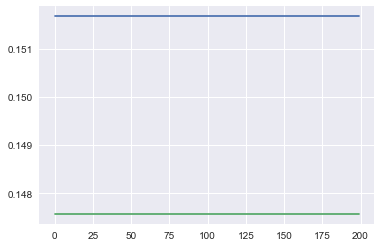

In [229]:
plt.plot([_ for _ in range(len(cmma))],cmma)
plt.plot([_ for _ in range(len(mmb))],mmb)

In [218]:
print(factor_mmb_cmma)

╒══════════════════════╤══════════════════╤══════════════════════════════════════════╕
│ money_market_bonus   │ collateral_mma   │   phi(money_market_bonus,collateral_mma) │
╞══════════════════════╪══════════════════╪══════════════════════════════════════════╡
│ money_market_bonus_0 │ collateral_mma_0 │                                   0.9049 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_0 │ collateral_mma_1 │                                   0.0799 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_0 │                                   0.0751 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_1 │                                   0.0953 │
╘══════════════════════╧══════════════════╧══════════════════════════════════════════╛


In [220]:
print(belief_nopriors['collateral_mma'].values[1])

0.151670177466


In [216]:
print(belief_nopriors['money_market_bonus'])

╒══════════════════════╤═══════════════════════════╕
│ money_market_bonus   │   phi(money_market_bonus) │
╞══════════════════════╪═══════════════════════════╡
│ money_market_bonus_0 │                    0.8524 │
├──────────────────────┼───────────────────────────┤
│ money_market_bonus_1 │                    0.1476 │
╘══════════════════════╧═══════════════════════════╛


In [194]:
#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None):
    """Returns the probability of having a given ESP product during a certain month.. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product"""
    start_time = time.time()
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    

    if week_n_one_time != None:
        dict_of_esp_money_market_cpd = esp_money_market_jointprob_probabilities(week_n_one_time) 

        factor_mmb_cmma = Joint(variables=['money_market_bonus', 'collateral_mma'],
                        cardinality=[2, 2],
                        values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                    dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
        factor_mmb_cm = Joint(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                    dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
        factor_mmb_fx = Joint(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                    dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
        factor_mmb_loc = Joint(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                    dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
        factor_mmb_es = Joint(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                    dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
        factor_mmb_checking = Joint(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                    dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   


        model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                           factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
        belief_propagation = BeliefPropagation(model)
        if evidence_ == None:
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'],
                                                      evidence=evidence_)
            return 
        else:


            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
    else:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            
            # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
            #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
            #mmb
            factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                        dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
            factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                        dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
            factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                        dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
            factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                        dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
            factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                        dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
            factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                        dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
            # collateral mma
            
            factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                        dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])
            
            factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                        dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
            factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                        dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
            factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                        dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
            factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                        dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
            # cash management
            factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                        dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
            factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                        dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
            factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                        dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
            factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                        dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  
            
            # FX products
            factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                        dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
            factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                        dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
            factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                        dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  
            
            # letters of credit
            
            factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                        dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
            factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                        dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
            #enterprise sweep
            
            factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                        dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  
            

            

            model.add_factors(factor_mmb_cmma, factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking,
                factor_cmma_cm , factor_cmma_fx, factor_cmma_loc,   factor_cmma_es,factor_cmma_checking,
                    factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking , factor_fx_loc,
                      factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )#,
            
            
            belief_propagation = BeliefPropagation(model)
            #var_elimination = VariableElimination(model)
#             belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma',
#                                         'fx_products','letters_of_credit','cash_management','enterprise_sweep'],
#                                                       evidence=evidence_)
            belief_propagation.calibrate()
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma',
                                                                 'cash_management','enterprise_sweep',
                                        'fx_products','letters_of_credit','checking_usd'],
                                                  evidence=evidence_)
#            belief_propagation.calibrate()

            # append the probabilities over time
            #return belief_nopriors
    
            #print(belief_nopriors['checking_usd'].values , 'prob of checking')
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
    #print(prob_cmma)
    #print(np.nan_to_num(np.array(prob_cmma)))
    end_time = time.time()
    print('{} weeks took {} seconds'.format(range_of_weeks,end_time-start_time))
    plt.figure(figsize=(15,8))
    plt.plot([_ for _ in range( len(prob_mmb))], np.nan_to_num(np.array(prob_mmb)),label='mmb')
    plt.plot([_ for _ in range( len(prob_cmma))], np.nan_to_num(np.array(prob_cmma)),label='cmma')
    plt.plot([_ for _ in range( len(prob_fx))], np.nan_to_num(np.array(prob_fx)),label='fx')
    plt.plot([_ for _ in range( len(prob_loc))], np.nan_to_num(np.array(prob_loc)),label='loc')
    plt.plot([_ for _ in range( len(prob_cm))], np.nan_to_num(np.array(prob_cm)),label='cm')
    plt.plot([_ for _ in range( len(prob_es))], np.nan_to_num(np.array(prob_es)),label='es')
    plt.plot([_ for _ in range( range_of_weeks)], np.nan_to_num(np.array(prob_checking)),label='checking', color='green')
    plt.legend()
    
        


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/pgmpy/factors/Factor.py:377: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


80 weeks took 123.37082505226135 seconds


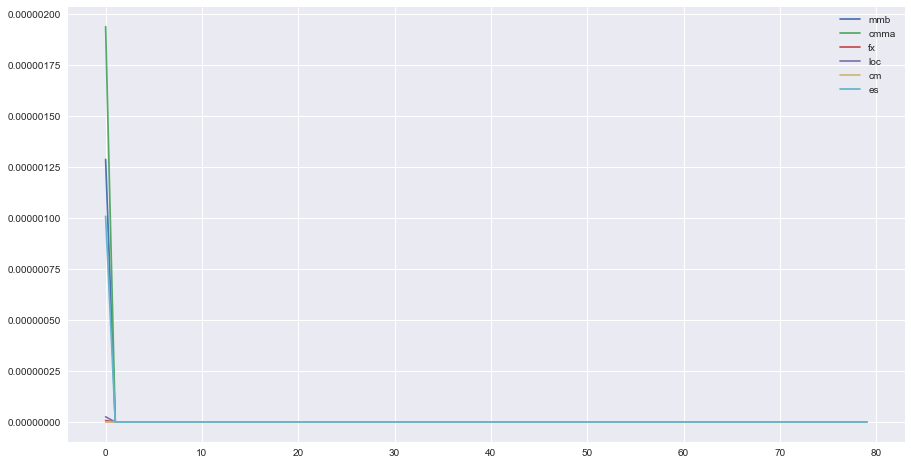

In [115]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_weeks=80,evidence_={'checking_usd':1})

/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/pgmpy/factors/Factor.py:377: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


[1.9046524282467356e-06, 4.620324903119136e-12, 1.3433774138325182e-17, 4.715847749013385e-23, 1.9830271789235011e-28, 9.9152026846116855e-34, 5.8554106703432554e-39, 4.0589893116916085e-44, 3.2840936149842807e-49, 0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[  1.90465243e-06   4.62032490e-12   1.34337741e-17   4.71584775e-23
   1.98302718e-28   9.91520268e-34   5.85541067e-39   4.05898931e-44
   3.28409361e-49   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   

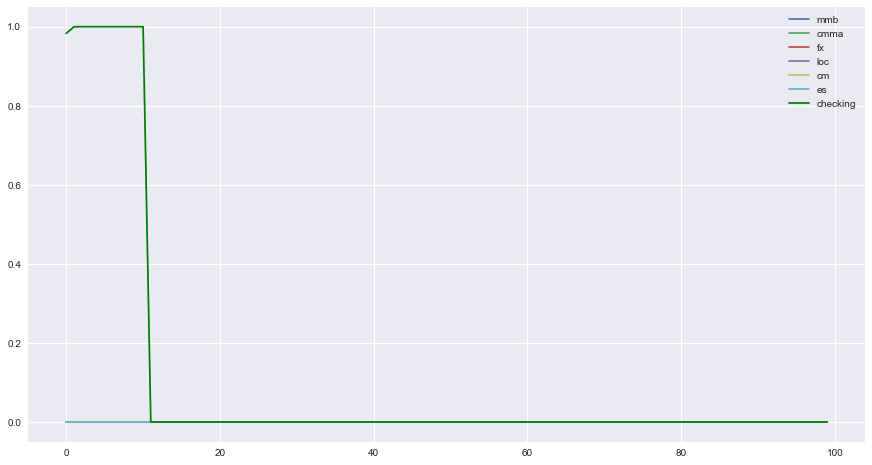

In [112]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_weeks=100)

60 weeks took 66.37453699111938 seconds


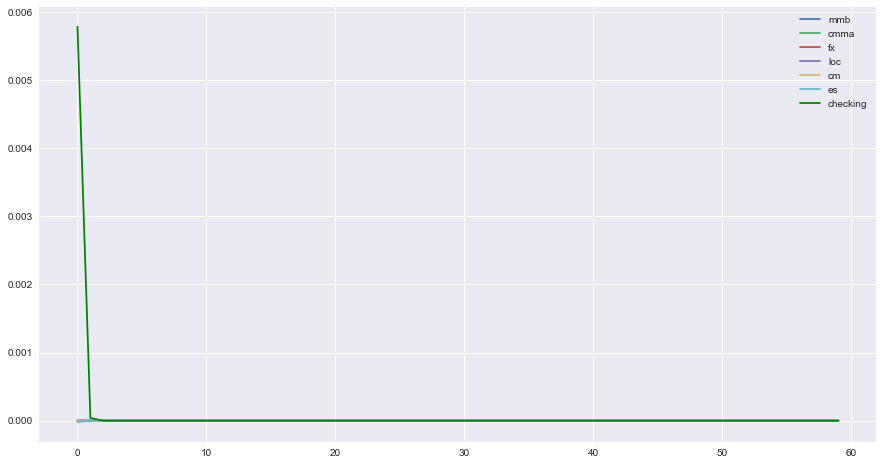

In [196]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_weeks=60) # limit the probs + var elimination

In [190]:
checking = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,range_of_weeks=10) # limit the probs 

In [193]:
print(checking['checking_usd'])

╒════════════════╤═════════════════════╕
│ checking_usd   │   phi(checking_usd) │
╞════════════════╪═════════════════════╡
│ checking_usd_0 │              0.9942 │
├────────────────┼─────────────────────┤
│ checking_usd_1 │              0.0058 │
╘════════════════╧═════════════════════╛


In [249]:
model.get_local_independencies()

(collateral_mma _|_ fx_products, enterprise_sweep, checking_usd, letters_of_credit, cash_management | money_market_bonus)
(checking_usd _|_ fx_products, enterprise_sweep, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(cash_management _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, letters_of_credit | money_market_bonus)
(fx_products _|_ enterprise_sweep, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(letters_of_credit _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, cash_management | money_market_bonus)
(enterprise_sweep _|_ fx_products, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)

In [183]:
from IPython.display import Image
print(factor_mmb_checking)

╒══════════════════════╤════════════════╤════════════════════════════════════════╕
│ money_market_bonus   │ checking_usd   │   phi(money_market_bonus,checking_usd) │
╞══════════════════════╪════════════════╪════════════════════════════════════════╡
│ money_market_bonus_0 │ checking_usd_0 │                                 0.9912 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_0 │ checking_usd_1 │                                 0.5662 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_0 │                                 0.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_1 │                                 0.0088 │
╘══════════════════════╧════════════════╧════════════════════════════════════════╛


In [220]:
belief_propagation = BeliefPropagation(model)

In [221]:
belief = belief_propagation.query(variables=['collateral_mma'])

In [237]:
belief['collateral_mma'].values

array([  1.00000000e+00,   1.35741448e-53])

In [59]:
dict_of_esp_money_market_cpd = dict_of_esp_money_market_joint_prob

In [60]:


factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                            dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                            dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                            dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                            dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                            dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                            dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

# factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .5, .5])

# factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.4, .6, .3, .7])

# factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                     cardinality=[2, 2],
#                     values=[.2, .8, .9, .1])

# factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.3, .7, .4, .6])

# factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .4, .6])

model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                   factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
belief_propagation = BeliefPropagation(model)
tes = belief_propagation.query(variables=['cash_management','enterprise_sweep','money_market_bonus'],
                              evidence={'checking_usd':0})

ValueError: Factor inconsistent with the model.

In [ ]:
cm0_checking0': 0.98050885200000004,
'cm0_checking1': 0.61828162900000005,
'cm0_es0': 0.99938906900000002
'cm1_checking0': 8.3459461199999996e-06,
 'cm1_checking1': 0.019491147600000001,

In [169]:
model = MarkovModel([( 'cm','check'), ('cm', 'C'),\
('C', 'D'), ('D', 'A')])
factor_a_b = Factor(variables=['cm', 'check'],
    cardinality=[2, 2], \
    values=[.98, .62, .0000083, .02])
# factor_b_c = Factor(variables=['B', 'C'],
#     cardinaity=[2, 2],
#     values=[100, 3, 2, 4])
factor_c_d = Factor(variables=['C', 'cm'],
    cardinality=[2, 2],
    values=[.3, .5, .1, .6])

model.add_factors(factor_a_b, factor_c_d)

In [170]:
belief = BeliefPropagation(model)

TypeError: reduce() of empty sequence with no initial value

In [147]:
test = belief.query(variables=['B','C'],
                              evidence={'A':0})

In [148]:
test['B'].values

array([ 0.95238095,  0.04761905])

In [101]:
print(test)

{'B': <Factor representing phi(B:2) at 0x111dedf98>, 'C': <Factor representing phi(C:2) at 0x111dedf60>}


In [100]:
print(factor_a_b)

╒═════╤═════╤════════════╕
│ A   │ B   │   phi(A,B) │
╞═════╪═════╪════════════╡
│ A_0 │ B_0 │   100.0000 │
├─────┼─────┼────────────┤
│ A_0 │ B_1 │     5.0000 │
├─────┼─────┼────────────┤
│ A_1 │ B_0 │     5.0000 │
├─────┼─────┼────────────┤
│ A_1 │ B_1 │   100.0000 │
╘═════╧═════╧════════════╛


In [183]:
>>> bayesian_model = BayesianModel([('A', 'J'), ('R', 'J'), ('J', 'Q'),
...                                 ('J', 'L'), ('G', 'L')])
>>> cpd_a = TabularCPD('A', 2, [[0.2], [0.8]])
>>> cpd_r = TabularCPD('R', 2, [[0.4], [0.6]])
>>> cpd_j = TabularCPD('J', 2,
...                    [[0.9, 0.6, 0.7, 0.1],
...                     [0.1, 0.4, 0.3, 0.9]],
...                    ['R', 'A'], [2, 2])
>>> cpd_q = TabularCPD('Q', 2,
...                    [[0.9, 0.2],
...                     [0.1, 0.8]],
...                    ['J'], [2])
>>> cpd_l = TabularCPD('L', 2,
...                    [[0.9, 0.45, 0.8, 0.1],
...                     [0.1, 0.55, 0.2, 0.9]],
...                    ['G', 'J'], [2, 2])
>>> cpd_g = TabularCPD('G', 2, [[0.6], [0.4]])
>>> belief_propagation = BeliefPropagation(bayesian_model)
>>> belief_propagation.map_query(variables=['J', 'Q'],
...                              evidence={'A': 0, 'R': 0, 'G': 0, 'L': 1})

NameError: name 'TabularCPD' is not defined

In [ ]:
Discre